In [1]:
# Importing the dependencies.

# To perform numerical operations on matrices and arrays.
import numpy as np

# To handle dataframes and retrieve data from files.
import pandas as pd

# To interpret and visualise data in the form of |graphs and charts.
import matplotlib.pyplot as plt

#To access the contents of a folder.
import os

# Library containing Computer Vision tools to apply read, show, resize, etc operations to an image.
import cv2

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Framework to train and run neural networks.
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
#from keras.preprocessing.image import ImageDataGenerator

In [2]:
df=pd.read_csv("D:\Intern\DAR\state-farm-distracted-driver-detection\driver_imgs_list.csv") # Reading data.
df.head() # Printing head.

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [3]:
features=df["img"] # getting img column into features.
labels=df["classname"] # getting classname column into labels.

In [4]:
df["classname"].value_counts() # printing counts of each class.

c0    2489
c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c1    2267
c9    2129
c7    2002
c8    1911
Name: classname, dtype: int64

<AxesSubplot:>

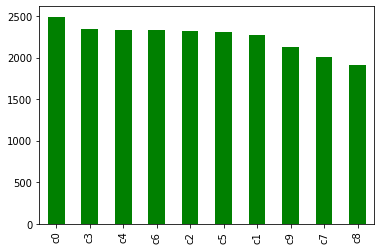

In [5]:
df["classname"].value_counts().plot(kind='bar',color='g') # Visualising of the class-wise data

<AxesSubplot:ylabel='classname'>

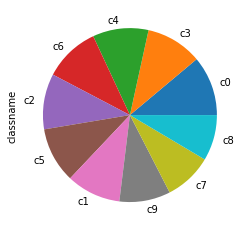

In [6]:
df["classname"].value_counts().plot(kind='pie') # Visualising of the class-wise data

In [7]:
path="D:/Intern/DAR/state-farm-distracted-driver-detection/imgs/train" # Path of the training images.
folder_names=os.listdir(path) # Getting the list of sub-folders in the training folder
folder_names 

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [8]:
# Printing the total contents of each subfolder.
for i,folder in enumerate( folder_names):
    print(folder,"contains",len(os.listdir(path+"/"+folder))) 

c0 contains 2489
c1 contains 2267
c2 contains 2317
c3 contains 2346
c4 contains 2326
c5 contains 2312
c6 contains 2325
c7 contains 2002
c8 contains 1911
c9 contains 2129


In [9]:
# Function to read images in color i.e in RGB mode.
def read_color():    
    path="D:/Intern/DAR/state-farm-distracted-driver-detection/imgs/train" # Path
    image_data=[] # Array to store image data
    label_data=[] # Array to store label data
    for i in range(len (features)): # For each image
        img=cv2.imread(path+"/"+labels[i]+"/"+ features[i],cv2.IMREAD_COLOR)  # Reading it
        img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) ,(64,64)) # Resizing and Switching channels from BGR to RGB.
        image_data.append(img) # Appending updated images in image_data array.
        label_data.append(labels[i]) # Appending updated labels in label_data array.
    return image_data,label_data # Returning variables.

In [10]:
# Function to split image_data and label_data for training and testing
def split(image_data,label_data):
    # Splitting the available data into training and testing data seperately in 80%-20%
    # train_images, train_labels will have values for TRAINING data.
    # images_validation_test, labels_validation_test will have values for VALIDATING data.
    train_images, images_validation_test, train_labels, labels_validation_test = train_test_split(
        image_data, label_data, test_size=0.2, random_state=50, stratify=labels)
    
    # Splitting the TESTING data into TESTING and VALIDATING data seperately in 50%-50%
    # i.e so that final ratio would be TRAINING (80%), VALIDATING (10%), TESTING (10%)
    # validation_images, validation_labels will have values for VALIDATING data.
    # test_images, test_labels will have values for TESTING data.
    validation_images, test_images, validation_labels, test_labels = train_test_split(
        images_validation_test, labels_validation_test, test_size=0.5,random_state=50,stratify=labels_validation_test)
    
    # Converting all of this data to arrays.
    train_images=np.asarray(train_images)
    validation_images=np.asarray(validation_images)
    test_images=np.asarray(test_images)
    train_labels=np.asarray(train_labels)
    validation_labels=np.asarray(validation_labels)
    test_labels=np.asarray(test_labels)
    
    # returning all variables after the split.
    return train_images,train_labels,validation_images,validation_labels,test_images,test_labels

In [11]:
# Function for pre-processing the feature variables before training.
def feature_preprocessing(train_images,validation_images,test_images):
    # Regularizing each pixel value so that the numerics fall in between 0 and 1.
    # So as to result in faster training period.
                                                  
    train_images = train_images.astype('float32') / 255
    validation_images = validation_images.astype('float32') / 255
    test_images = test_images.astype('float32') / 255
                                                  
    # returning all pre-processed variables.
    return train_images,validation_images,test_images

In [12]:
# Function for pre-processing the label variables before training.
def label_preprocessing(train_labels,validation_labels,test_labels):   
    # Loading label encoder to convert labels into numeric form to make them machine-readable.
    label_encoder = LabelEncoder() 
    
    # Doing fit transform for standardization of the respective values --1
    # And then changing the respective class variables to integers using to_categorical. --2
    vec = label_encoder.fit_transform(train_labels)      # 1
    train_labels = to_categorical(vec)                   # 2
    vec = label_encoder.fit_transform(validation_labels) # 1
    validation_labels = to_categorical(vec)              # 2
    vec = label_encoder.fit_transform(test_labels)       # 1
    test_labels = to_categorical(vec)                    # 2
    
    # returning all pre-processed variables.
    return train_labels,validation_labels,test_labels 

In [13]:
# Getting data into respective by calling the corresponding functions.
image_data, label_data=read_color() 
train_images,train_labels,validation_images,validation_labels,test_images,test_labels=split(image_data,label_data)
train_labels,validation_labels,test_labels=label_preprocessing(train_labels,validation_labels,test_labels)
train_images,validation_images,test_images=feature_preprocessing(train_images,validation_images,test_images)

In [14]:
# Applying the model.
# Performing  2D convolution and Max Pooling with relu activation function

network_cnn = models.Sequential()
network_cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64,64,3)))
network_cnn.add(layers.MaxPooling2D((2, 2)))
network_cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
network_cnn.add(layers.MaxPooling2D((2, 2)))
network_cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
network_cnn.add(layers.Flatten())
network_cnn.add(layers.Dense(128, activation='relu'))
network_cnn.add(layers.Dense(10, activation='softmax'))

In [15]:
# Printing the network summary.
network_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 4608)              0

In [16]:
# Performing the model training.
# network_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network_cnn.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

c:\users\manoh\appdata\local\programs\python\python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
model_cnn=network_cnn.fit(train_images, train_labels, 
                          validation_data=(validation_images,validation_labels),epochs=20, batch_size=128)

Epoch 1/20
141/141 [==============================] - 8s 25ms/step - loss: 1.0171 - accuracy: 0.6592 - val_loss: 0.2930 - val_accuracy: 0.9286
Epoch 2/20
141/141 [==============================] - 3s 21ms/step - loss: 0.1610 - accuracy: 0.9572 - val_loss: 0.1371 - val_accuracy: 0.9657
Epoch 3/20
141/141 [==============================] - 3s 20ms/step - loss: 0.0654 - accuracy: 0.9831 - val_loss: 0.0817 - val_accuracy: 0.9781
Epoch 4/20
141/141 [==============================] - 3s 20ms/step - loss: 0.0371 - accuracy: 0.9900 - val_loss: 0.0642 - val_accuracy: 0.9862
Epoch 5/20
141/141 [==============================] - 3s 23ms/step - loss: 0.0254 - accuracy: 0.9929 - val_loss: 0.0659 - val_accuracy: 0.9813
Epoch 6/20
141/141 [==============================] - 3s 20ms/step - loss: 0.0205 - accuracy: 0.9947 - val_loss: 0.0514 - val_accuracy: 0.9857
Epoch 7/20
141/141 [==============================] - 3s 21ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.0815 - val_accuracy: 0.9764

In [18]:
# Getting the accuracy of our model.
test_loss, test_acc = network_cnn.evaluate(test_images, test_labels)
print("Accuracy of the proposed model:",test_acc*100,"%")

71/71 [==============================] - 2s 17ms/step - loss: 0.0196 - accuracy: 0.9947
Accuracy of the proposed model: 99.46500062942505 %


In [19]:
# Printing the predicted values and actual values for test images.
prediction = network_cnn.predict(test_images)
pred_vals = []
for x in prediction:
    pred_vals.append(np.argmax(x))
test_vals = []
for x in test_labels:
    test_vals.append(np.where(x==(x.max()))[0][0])
print(len(pred_vals),len(test_labels),pred_vals,test_vals,sep="\n\n\n")

71/71 [==============================] - 1s 11ms/step
2243


2243


[3, 1, 9, 4, 8, 5, 8, 9, 7, 0, 7, 3, 3, 7, 5, 6, 6, 5, 1, 6, 9, 4, 5, 4, 9, 7, 6, 0, 4, 1, 3, 7, 2, 5, 7, 1, 1, 1, 6, 4, 8, 2, 5, 8, 9, 5, 5, 1, 5, 2, 6, 3, 6, 2, 8, 5, 5, 9, 2, 2, 4, 1, 7, 5, 5, 7, 8, 9, 4, 7, 8, 6, 1, 7, 7, 1, 6, 9, 2, 7, 3, 9, 9, 7, 9, 0, 6, 4, 3, 7, 2, 7, 3, 0, 2, 4, 5, 5, 2, 0, 7, 2, 6, 6, 9, 9, 9, 9, 6, 6, 4, 5, 1, 9, 7, 0, 7, 6, 0, 9, 3, 4, 8, 3, 4, 6, 2, 6, 9, 1, 1, 0, 0, 8, 7, 7, 5, 3, 3, 3, 9, 6, 8, 2, 7, 6, 5, 5, 4, 2, 3, 9, 4, 9, 6, 5, 8, 6, 3, 0, 9, 7, 1, 2, 7, 4, 2, 6, 3, 0, 3, 1, 9, 5, 2, 6, 2, 6, 1, 3, 5, 3, 4, 2, 1, 8, 7, 5, 7, 5, 6, 7, 1, 8, 4, 8, 3, 2, 8, 3, 6, 0, 7, 8, 3, 4, 1, 7, 0, 0, 3, 7, 1, 3, 4, 7, 4, 8, 5, 2, 7, 7, 5, 4, 5, 0, 8, 0, 1, 8, 3, 1, 4, 4, 4, 3, 6, 6, 5, 7, 6, 6, 5, 1, 4, 4, 5, 7, 5, 9, 3, 2, 5, 0, 7, 5, 0, 8, 6, 7, 5, 9, 4, 7, 9, 5, 0, 6, 4, 0, 3, 8, 3, 8, 0, 1, 4, 1, 4, 2, 6, 0, 3, 7, 1, 4, 5, 9, 0, 5, 3, 9, 0, 2, 0, 6, 9, 2, 4, 3, 3, 9, 1, 8, 6, 8, 9, 9, 0, 3, 7

<AxesSubplot:>

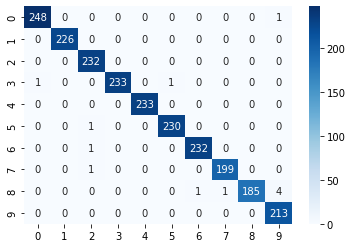

In [22]:
# Plotting the confusion matrix.
cf_matrix = confusion_matrix(test_vals,pred_vals)
sns.heatmap(cf_matrix, fmt='d',annot=True,cmap='Blues')

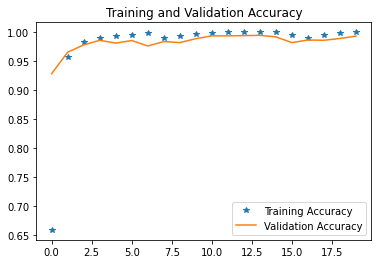

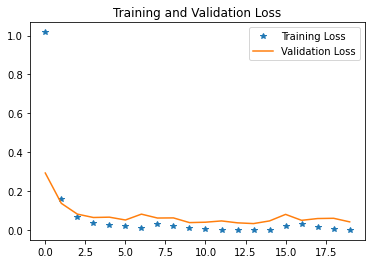

<Figure size 432x288 with 0 Axes>

In [23]:
# Plotting the curves for accuracy and loss.

acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']
loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

iters = range(len(acc))
plt.plot(iters, acc, '*', label='Training Accuracy')
plt.plot(iters, val_acc, '-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(iters, loss, '*', label='Training Loss')
plt.plot(iters, val_loss, '-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

plt.show()

In [24]:
# Applying DenseNet121 Model.
Dense_net = models.Sequential()
pretrained_model = tf.keras.applications.DenseNet121(include_top=False,
                                                  input_shape=(64,64,3),
                                                  pooling='avg',
                                                  classes=10,
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False   # Making those layers untrainable so that weights doesnt change anymore.
    
Dense_net.add(pretrained_model)
Dense_net.add(Flatten())
Dense_net.add(Dense(128,activation='relu'))
Dense_net.add(Dense(10,activation='softmax'))

In [25]:
Dense_net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 module_wrapper (ModuleWrapp  (None, 1024)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 128)              131200    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 10)               1290      
 pper)                                                           
                                                                 
Total params: 7,169,994
Trainable params: 132,490
Non-trainable params: 7,037,504
______________________________________

In [26]:
Dense_net.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

c:\users\manoh\appdata\local\programs\python\python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
epochs = 25
history = Dense_net.fit(train_images, train_labels, 
                          validation_data=(validation_images,validation_labels),epochs=epochs, batch_size=128)

Epoch 1/25
141/141 [==============================] - 23s 89ms/step - loss: 1.4283 - accuracy: 0.5495 - val_loss: 0.7169 - val_accuracy: 0.7797
Epoch 2/25
141/141 [==============================] - 7s 53ms/step - loss: 0.5147 - accuracy: 0.8487 - val_loss: 0.4202 - val_accuracy: 0.8791
Epoch 3/25
141/141 [==============================] - 7s 53ms/step - loss: 0.3217 - accuracy: 0.9111 - val_loss: 0.3520 - val_accuracy: 0.8943
Epoch 4/25
141/141 [==============================] - 7s 51ms/step - loss: 0.2283 - accuracy: 0.9368 - val_loss: 0.2758 - val_accuracy: 0.9161
Epoch 5/25
141/141 [==============================] - 8s 54ms/step - loss: 0.1722 - accuracy: 0.9551 - val_loss: 0.2413 - val_accuracy: 0.9273
Epoch 6/25
141/141 [==============================] - 7s 52ms/step - loss: 0.1364 - accuracy: 0.9643 - val_loss: 0.2673 - val_accuracy: 0.9153
Epoch 7/25
141/141 [==============================] - 8s 54ms/step - loss: 0.1112 - accuracy: 0.9730 - val_loss: 0.2091 - val_accuracy: 0.939

In [28]:
# Getting the accuracy of DenseNet model.
test_loss, test_acc = Dense_net.evaluate(test_images, test_labels)
print("Accuracy of the densenet model:",test_acc*100,"%")

71/71 [==============================] - 5s 59ms/step - loss: 0.1042 - accuracy: 0.9692
Accuracy of the densenet model: 96.92376255989075 %


In [29]:
# Printing the predicted values and actual values for test images
prediction = Dense_net.predict(test_images)
pred_vals = []
for x in prediction:
    pred_vals.append(np.argmax(x))
test_vals = []
for x in test_labels:
    test_vals.append(np.where(x==(x.max()))[0][0])
print(len(pred_vals),len(test_labels),pred_vals,test_vals,sep="\n\n\n")

71/71 [==============================] - 5s 37ms/step
2243


2243


[3, 1, 9, 4, 8, 5, 8, 9, 7, 0, 7, 3, 3, 7, 5, 6, 6, 5, 1, 6, 9, 4, 5, 4, 9, 7, 6, 0, 4, 1, 3, 8, 2, 5, 7, 1, 1, 1, 6, 4, 8, 2, 5, 8, 9, 5, 5, 1, 5, 2, 6, 3, 6, 2, 8, 5, 5, 8, 2, 4, 4, 0, 7, 5, 5, 7, 8, 9, 4, 7, 8, 6, 1, 7, 7, 1, 6, 9, 2, 7, 3, 9, 9, 7, 9, 0, 6, 4, 3, 7, 2, 7, 3, 0, 2, 4, 5, 5, 2, 0, 7, 2, 6, 6, 9, 9, 9, 9, 6, 6, 4, 5, 1, 9, 7, 0, 7, 6, 0, 9, 3, 0, 8, 3, 4, 6, 2, 6, 9, 1, 1, 0, 0, 8, 7, 7, 5, 3, 3, 3, 0, 6, 8, 2, 7, 6, 5, 5, 4, 2, 3, 9, 4, 9, 6, 5, 8, 6, 3, 0, 9, 7, 1, 2, 7, 4, 2, 6, 3, 0, 3, 1, 9, 5, 2, 6, 2, 6, 1, 3, 5, 3, 4, 2, 1, 8, 7, 5, 7, 5, 6, 7, 1, 9, 4, 8, 3, 2, 8, 3, 6, 0, 7, 8, 3, 4, 1, 7, 0, 0, 3, 7, 1, 3, 4, 7, 4, 8, 5, 2, 7, 7, 5, 4, 5, 0, 8, 0, 1, 8, 3, 1, 4, 4, 4, 3, 6, 6, 5, 7, 6, 6, 5, 1, 4, 4, 5, 7, 5, 9, 3, 2, 5, 0, 7, 5, 0, 8, 6, 7, 5, 9, 4, 7, 9, 5, 0, 6, 4, 0, 3, 8, 3, 8, 0, 1, 4, 1, 4, 2, 6, 0, 3, 7, 1, 4, 5, 9, 0, 5, 3, 9, 0, 2, 0, 6, 9, 2, 4, 3, 3, 9, 1, 8, 6, 8, 9, 9, 0, 3, 7

<AxesSubplot:>

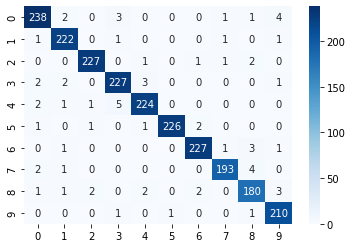

In [30]:
# Plotting the confusion matrix
cf_matrix = confusion_matrix(test_vals,pred_vals)
sns.heatmap(cf_matrix, fmt='d',annot=True,cmap='Blues')

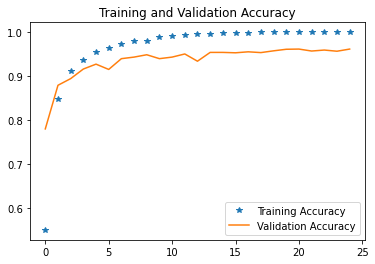

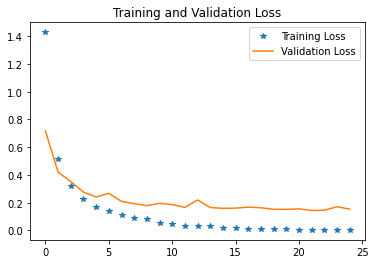

<Figure size 432x288 with 0 Axes>

In [31]:
# Plotting the curves for accuracy and loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

iters = range(len(acc))
plt.plot(iters, acc, '*', label='Training Accuracy')
plt.plot(iters, val_acc, '-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(iters, loss, '*', label='Training Loss')
plt.plot(iters, val_loss, '-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

plt.show()

In [32]:
# Applying VGG16 Model
vgg_net = models.Sequential()
pretrained_model = tf.keras.applications.VGG16(include_top=False,
                                                  input_shape=(64,64,3),
                                                  pooling='avg',
                                                  classes=10,
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False   # Making those layers untrainable so that weights doesnt change anymore.
    
vgg_net.add(pretrained_model)
vgg_net.add(Flatten())
vgg_net.add(Dense(128,activation='relu'))
vgg_net.add(Dense(10,activation='softmax'))

In [33]:
vgg_net.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

c:\users\manoh\appdata\local\programs\python\python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [34]:
epochs = 10
history = vgg_net.fit(train_images, train_labels, 
                          validation_data=(validation_images,validation_labels),epochs=epochs, batch_size=128)

Epoch 1/10
141/141 [==============================] - 11s 61ms/step - loss: 1.3458 - accuracy: 0.5528 - val_loss: 0.8823 - val_accuracy: 0.7007
Epoch 2/10
141/141 [==============================] - 7s 49ms/step - loss: 0.6140 - accuracy: 0.8041 - val_loss: 0.4994 - val_accuracy: 0.8497
Epoch 3/10
141/141 [==============================] - 7s 49ms/step - loss: 0.4325 - accuracy: 0.8628 - val_loss: 0.4554 - val_accuracy: 0.8524
Epoch 4/10
141/141 [==============================] - 7s 52ms/step - loss: 0.3493 - accuracy: 0.8928 - val_loss: 0.3230 - val_accuracy: 0.9028
Epoch 5/10
141/141 [==============================] - 8s 54ms/step - loss: 0.3018 - accuracy: 0.9062 - val_loss: 0.3157 - val_accuracy: 0.9117
Epoch 6/10
141/141 [==============================] - 8s 56ms/step - loss: 0.2609 - accuracy: 0.9181 - val_loss: 0.2985 - val_accuracy: 0.9108
Epoch 7/10
141/141 [==============================] - 8s 56ms/step - loss: 0.2207 - accuracy: 0.9326 - val_loss: 0.3138 - val_accuracy: 0.905

**ENSEMBLE MODEL**

In [74]:
# Resnet Model Predictions:
prediction_densenet = Dense_net.predict(test_images)

# VGG16 Model Predictions:
prediction_mycnn = network_cnn.predict(test_images)

# Ensemble Model Predictions:
prediction_ensemble = (prediction_densenet+prediction_mycnn)/2


pred_vals = []
for x in prediction_ensemble:
    pred_vals.append(np.argmax(x))
    
test_vals = []
for x in test_labels:
    test_vals.append(np.where(x==(x.max()))[0][0])
    
print(len(pred_vals),len(test_labels),pred_vals,test_vals,pred_vals[0],test_vals[0],sep="\n\n\n")

71/71 [==============================] - 0s 4ms/step
2243


2243


[3, 1, 9, 4, 8, 5, 8, 9, 7, 0, 7, 3, 3, 7, 5, 6, 6, 5, 1, 6, 9, 4, 5, 4, 9, 7, 6, 0, 4, 1, 3, 7, 2, 5, 7, 1, 1, 1, 6, 4, 8, 2, 5, 8, 9, 5, 5, 1, 5, 2, 6, 3, 6, 2, 8, 5, 5, 8, 2, 2, 4, 1, 7, 5, 5, 7, 8, 9, 4, 7, 8, 6, 1, 7, 7, 1, 6, 9, 2, 7, 3, 9, 9, 7, 9, 0, 6, 4, 3, 7, 2, 7, 3, 0, 2, 4, 5, 5, 2, 0, 7, 2, 6, 6, 9, 9, 9, 9, 6, 6, 4, 5, 1, 9, 7, 0, 7, 6, 0, 9, 3, 4, 8, 3, 4, 6, 2, 6, 9, 1, 1, 0, 0, 8, 7, 7, 5, 3, 3, 3, 0, 6, 8, 2, 7, 6, 5, 5, 4, 2, 3, 9, 4, 9, 6, 5, 8, 6, 3, 0, 9, 7, 1, 2, 7, 4, 2, 6, 3, 0, 3, 1, 9, 5, 2, 6, 2, 6, 1, 3, 5, 3, 4, 2, 1, 8, 7, 5, 7, 5, 6, 7, 1, 8, 4, 8, 3, 2, 8, 3, 6, 0, 7, 8, 3, 4, 1, 7, 0, 0, 3, 7, 1, 3, 4, 7, 4, 8, 5, 2, 7, 7, 5, 4, 5, 0, 8, 0, 1, 8, 3, 1, 4, 4, 4, 3, 6, 6, 5, 7, 6, 6, 5, 1, 4, 4, 5, 7, 5, 9, 3, 2, 5, 0, 7, 5, 0, 8, 6, 7, 5, 9, 4, 7, 9, 5, 0, 6, 4, 0, 3, 8, 3, 8, 0, 1, 4, 1, 4, 2, 6, 0, 3, 7, 1, 4, 5, 9, 0, 5, 3, 9, 0, 2, 0, 6, 9, 2, 4, 3, 3, 9, 1, 8, 6, 8, 9, 9, 0, 3, 7,

In [75]:
# Accuracy
correct_classifications=0
for i in range(len(test_images)):
    if pred_vals[i]==test_vals[i]:
        correct_classifications=correct_classifications+1
print("\n\nAccuracy of the ensemble model:",(correct_classifications/len(test_images))*100)



Accuracy of the ensemble model: 99.42041908158717


<AxesSubplot:>

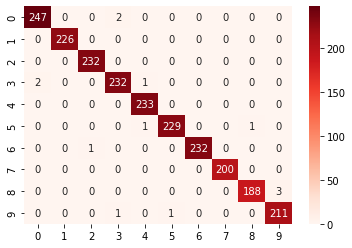

In [77]:
# Plotting the confusion matrix for VGG16 model for Exp-1.
cf_matrix = confusion_matrix(test_vals,pred_vals)
sns.heatmap(cf_matrix, fmt='d',annot=True,cmap='Reds')

In [48]:
from keras.preprocessing import image
import tensorflow
import numpy as np

In [49]:
# Function for image pre-processing.
def image_preprocessing(img_path):   
    img = tensorflow.keras.preprocessing.image.load_img(img_path, target_size=(64, 64)) # Resizing the image
    img_preproc = tensorflow.keras.preprocessing.image.img_to_array(img) # Changing it to array
    img_preproc = np.expand_dims(img_preproc, axis=0) # Expanding dimensions
    img_preproc /= 255. # Regularizing              
    
    # returning all pre-processed variables.
    return img_preproc 

In [50]:
img_path="D:\Intern\DAR\state-farm-distracted-driver-detection\imgs/train/c3/img_1317.jpg"
img_preproc = image_preprocessing(img_path)

In [51]:
from keras import models
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in network_cnn.layers[:5]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=network_cnn.input, outputs=layer_outputs)
activations = activation_model.predict(img_preproc)

1/1 [==============================] - 0s 236ms/step


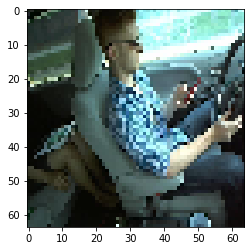

In [52]:
plt.imshow(img_preproc[0])
plt.show()

In [53]:
len(activations)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 62, 62, 64)


In [54]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 62, 62, 64)


In [55]:
network_cnn.layers[:4]

(1, 62, 62, 64)
(1, 31, 31, 64)
(1, 29, 29, 32)
(1, 14, 14, 32)
(1, 12, 12, 32)


C:\Users\manoh\AppData\Local\Temp\ipykernel_13880\193981690.py:29: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


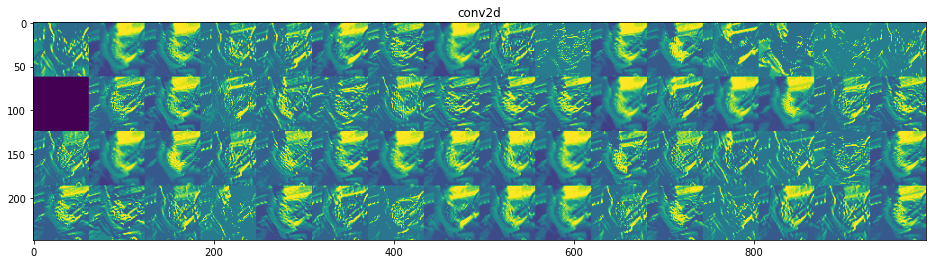

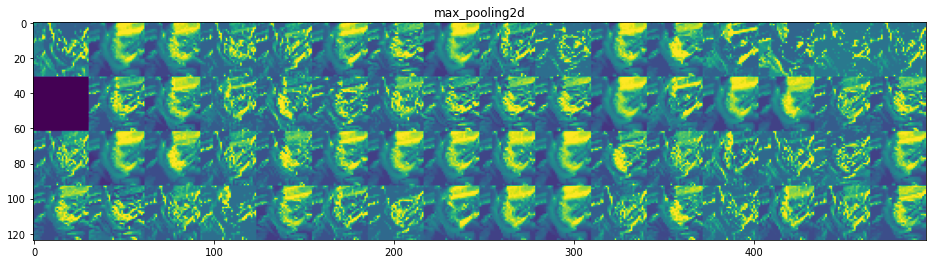

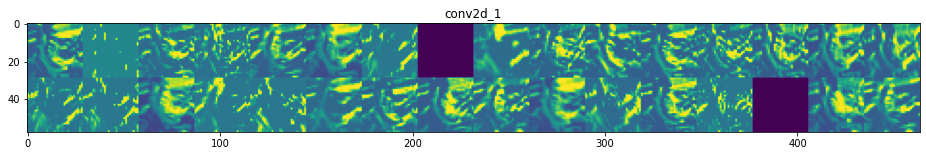

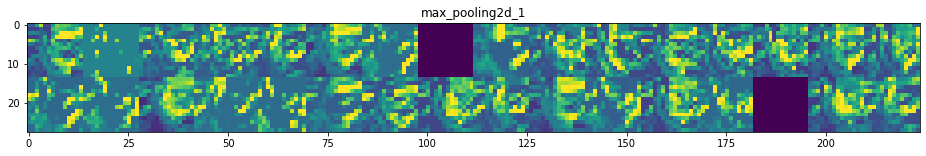

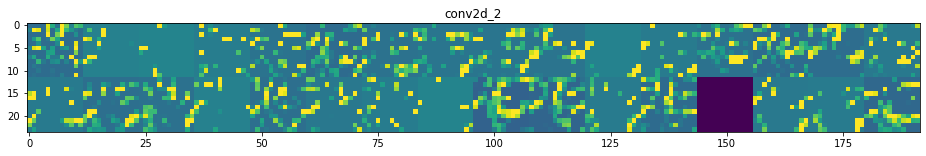

In [56]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in network_cnn.layers[:5]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    print(layer_activation.shape)
    n_features = layer_activation.shape[-1]
    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]
    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [57]:
from keras import backend as K 
K.clear_session()

In [61]:
# Function to display outputs of sample test images.
def testing_output(img_preproc,class_names):
    
    # Printing Parameters
    plt.imshow(img_preproc[0]) # Printing image
    plt.show()

    #print(img_preproc.shape) # Printing its shape now.
   
    prediction = network_cnn.predict(img_preproc) # Predicting the output
    #print(prediction) # Printing the prediction values.

    max_val = np.argmax(prediction)
    #print(max_val) # Printing the max prediction value.

    class_out = class_names[max_val]
    print(class_out) # Printing the index of the max prediction value.

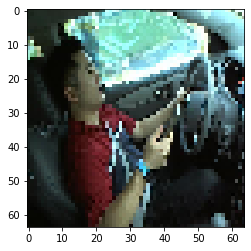

1/1 [==============================] - 0s 140ms/step
Texting Right


In [65]:
# Enter Path here.
img_path="D:\Intern\DAR\state-farm-distracted-driver-detection\imgs/train/c1/img_1950.jpg" 

# Enter Class names here.
class_names = ["Normal Driving","Texting Right","Calling Right","Texting Left","Calling Left"
                   ,"Checking Radio","Drinking","Looking Behind","Makeup","Talking with co-passenger"] 

img_preproc = image_preprocessing(img_path)
testing_output(img_preproc,class_names)